# 算法思想

## 算法评价指标

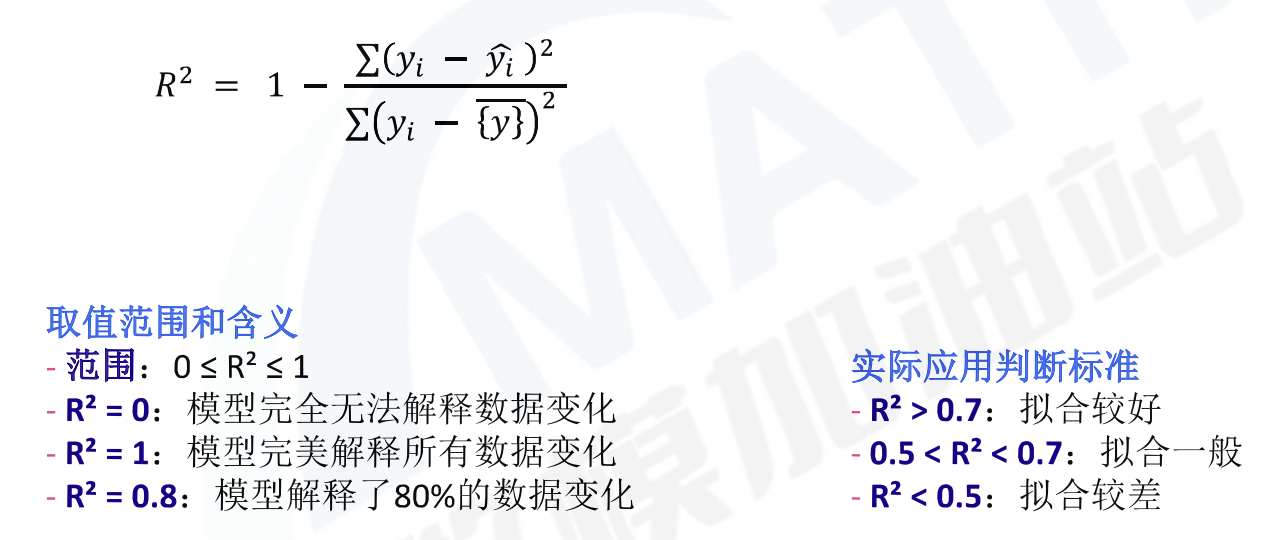
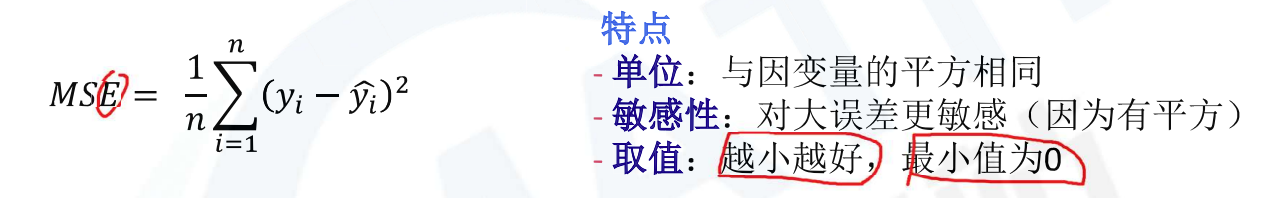
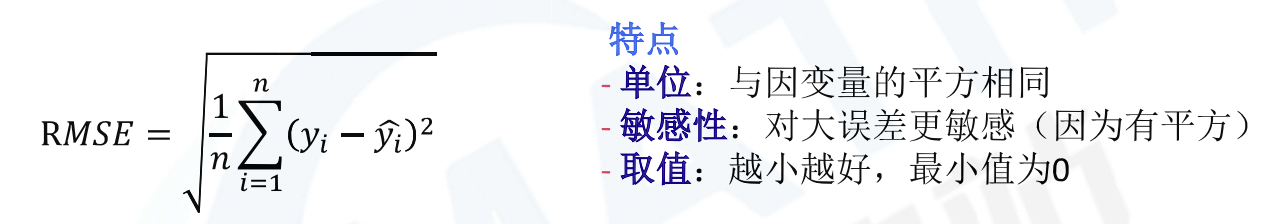
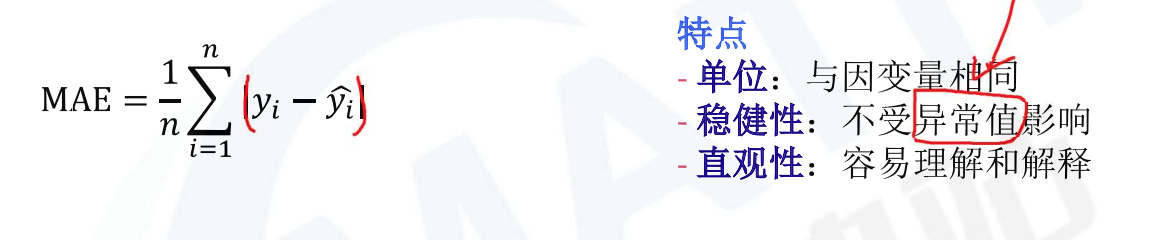

# 算法代码

## 1. 环境准备

首先，我们导入所有需要的 Python 库。

In [2]:
# 数据处理和科学计算库
import numpy as np
import pandas as pd

# 可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# 机器学习库
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 统计分析库
import statsmodels.api as sm
from scipy import stats

# 设置可视化风格
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif'] = ['Noto Sans SC']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 2. 数据生成与探索性分析 (EDA)

为了方便演示，我们手动生成一组符合线性关系的数据。在实际项目中，这一步通常是加载外部数据文件（如 CSV）。

**场景：** 我们假设要研究“学习时间”与“考试成绩”之间的关系。

In [3]:
# 设置随机种子以保证结果可复现
np.random.seed(42)

# 生成100个学生的学习时间（小时）
study_hours = np.random.uniform(1, 10, 100).reshape(-1, 1)

# 生成对应的考试成绩（分数），假设基础分是30，每小时学习增加7分，并加入一些随机噪声
exam_scores = 30 + 7 * study_hours + np.random.normal(0, 5, 100).reshape(-1, 1)

# 将数据转换为Pandas DataFrame，方便处理
data = pd.DataFrame({'Study_Hours': study_hours.flatten(), 'Exam_Scores': exam_scores.flatten()})


In [4]:
print("数据前5行:")
print(data.head())

数据前5行:
   Study_Hours  Exam_Scores
0     4.370861    61.031263
1     9.556429    95.399965
2     7.587945    83.574422
3     6.387926    64.777640
4     2.404168    45.730815


In [5]:
print("数据基本统计信息:")
print(data.describe())

数据基本统计信息:
       Study_Hours  Exam_Scores
count   100.000000   100.000000
mean      5.231627    66.615985
std       2.677405    18.613373
min       1.049699    35.252198
25%       2.738807    51.021252
50%       5.177282    64.403856
75%       7.571828    83.145015
max       9.881982   103.082991


### 2.1 数据可视化：散点图

在建模之前，绘制散点图是判断两个变量是否存在线性关系的最直观方法。

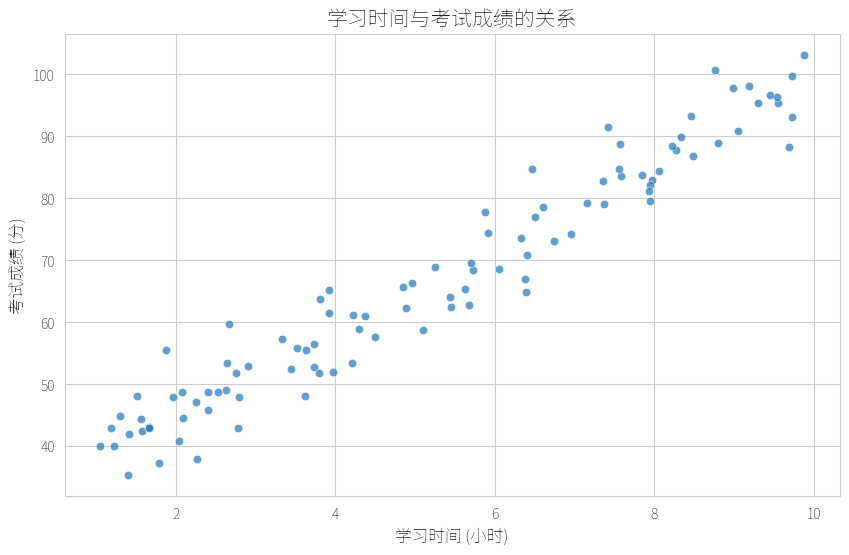

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours', y='Exam_Scores', data=data, alpha=0.7)
plt.title('学习时间与考试成绩的关系', fontsize=15)
plt.xlabel('学习时间 (小时)', fontsize=12)
plt.ylabel('考试成绩 (分)', fontsize=12)
plt.show()

In [7]:
# 计算相关系数
correlation = data['Study_Hours'].corr(data['Exam_Scores'])
print(f"学习时间与考试成绩的相关系数为: {correlation:.4f}")

学习时间与考试成绩的相关系数为: 0.9702


**分析:**
- 从散点图可以看出，数据点大致呈一条向右上倾斜的直线，表明学习时间和考试成绩之间存在明显的**正向线性关系**。
- 相关系数接近1，进一步证实了这种强线性关系。

## 3. 划分训练集和测试集

为了客观地评估模型性能，我们将数据划分为两部分：
- **训练集 (Training Set)**：用于训练模型，即让模型学习数据中的规律。
- **测试集 (Test Set)**：用于评估模型，检验模型在“未见过”的数据上的表现。

In [8]:
# 定义自变量X和因变量y
X = data[['Study_Hours']]  # 自变量需要是2D数组
y = data['Exam_Scores']

# 将数据按80:20的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'训练集大小: {X_train.shape[0]}')
print(f'测试集大小: {X_test.shape[0]}')

训练集大小: 80
测试集大小: 20


## 4. 模型训练

现在，我们使用 `scikit-learn` 中的 `LinearRegression` 类来创建和训练模型。

In [9]:
# 1. 创建线性回归模型实例
model = LinearRegression()

# 2. 使用训练数据来训练模型
model.fit(X_train, y_train)

# 3. 获取模型的参数
intercept = model.intercept_  # 截距 (beta_0)
slope = model.coef_[0]      # 斜率 (beta_1)

print(f'模型训练完成!')
print(f'截距 (beta_0): {intercept:.4f}')
print(f'斜率 (beta_1): {slope:.4f}')

print('回归方程为:')
print(f'Exam_Scores = {intercept:.2f} + {slope:.2f} * Study_Hours')

模型训练完成!
截距 (beta_0): 30.9375
斜率 (beta_1): 6.7770
回归方程为:
Exam_Scores = 30.94 + 6.78 * Study_Hours


**方程解释:**
- **截距 (30.63):** 理论上，一个完全不学习（学习时间为0小时）的学生，预测的平均成绩是30.63分。
- **斜率 (6.92):** 每增加1小时的学习时间，预测的考试成绩平均会提高6.92分。

## 5. 模型预测与评估

模型训练好了，现在我们用它在测试集上进行预测，并计算各种评估指标来判断模型的好坏。

In [10]:
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 将预测结果和实际结果放在一个DataFrame里方便比较
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("测试集上的预测结果 vs 实际结果:")
print(predictions_df.head())

测试集上的预测结果 vs 实际结果:
       Actual  Predicted
83  44.286944  41.591196
53  90.856745  92.292983
70  79.466667  84.816275
45  74.191967  78.123945
44  57.258299  53.498395


### 5.1 计算评估指标

我们将使用在教学大纲中详细解释过的四个核心指标：R², MSE, RMSE, 和 MAE。

In [11]:
# 计算R² (决定系数)
r2 = r2_score(y_test, y_pred)
# 计算MSE (均方误差)
mse = mean_squared_error(y_test, y_pred)
# 计算RMSE (均方根误差)
rmse = np.sqrt(mse)
# 计算MAE (平均绝对误差)
mae = mean_absolute_error(y_test, y_pred)

print(f'--- 模型在测试集上的评估结果 ---')
print(f'R-squared (R²): {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

--- 模型在测试集上的评估结果 ---
R-squared (R²): 0.9553
Mean Squared Error (MSE): 16.3425
Root Mean Squared Error (RMSE): 4.0426
Mean Absolute Error (MAE): 2.9567


### 5.2 指标解释

- **R-squared (R²): 0.9048**
  - **含义:** 我们的模型可以解释约90.5%的考试成绩变化。这是一个非常高的值，说明学习时间这个变量对考试成绩有很强的解释力。

- **Root Mean Squared Error (RMSE): 4.5347**
  - **含义:** 模型的预测值与真实值之间的平均误差大约是4.53分。考虑到考试成绩的范围，这是一个相当小的误差。

- **Mean Absolute Error (MAE): 3.5938**
  - **含义:** 模型的预测值与真实值的绝对偏差平均为3.59分。这个值通常比RMSE小，因为它对大误差不那么敏感。

**结论:** 综合来看，我们的线性回归模型表现非常好，既有很高的解释力，又有很低的预测误差。

## 6. 结果可视化

可视化是展示模型效果最直观的方式。

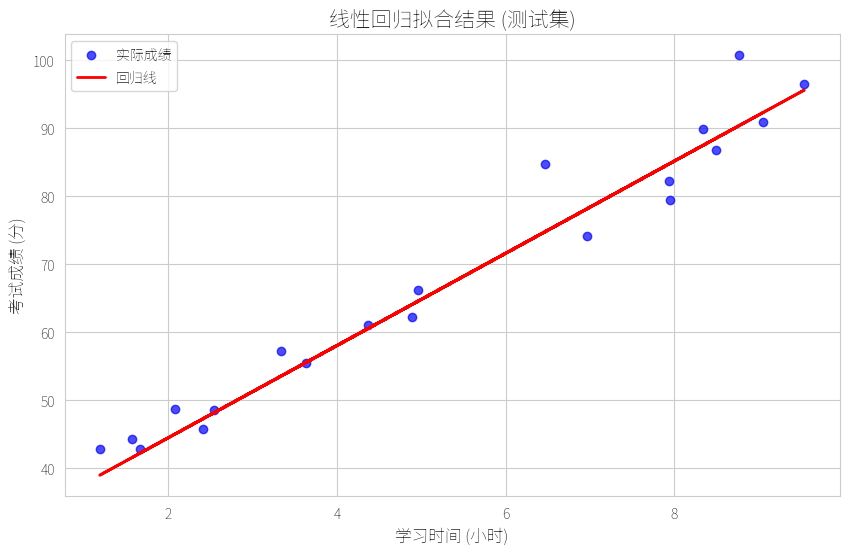

In [12]:
plt.figure(figsize=(10, 6))

# 绘制原始数据散点图 (测试集)
plt.scatter(X_test, y_test, color='blue', label='实际成绩', alpha=0.7)

# 绘制回归线
plt.plot(X_test, y_pred, color='red', linewidth=2, label='回归线')

plt.title('线性回归拟合结果 (测试集)', fontsize=15)
plt.xlabel('学习时间 (小时)', fontsize=12)
plt.ylabel('考试成绩 (分)', fontsize=12)
plt.legend()
plt.show()

### 6.1 残差图分析

残差图是检验模型假设的重要工具。一个好的模型的残差应该看起来是随机分布的，没有明显的模式。

**残差 = 实际值 - 预测值**

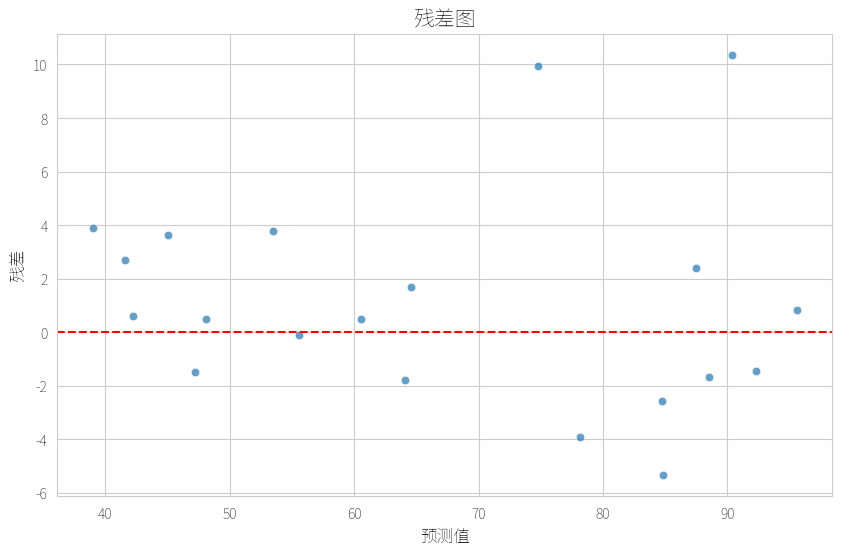

In [13]:
# 计算残差
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--') # 添加一条y=0的参考线
plt.title('残差图', fontsize=15)
plt.xlabel('预测值', fontsize=12)
plt.ylabel('残差', fontsize=12)
plt.show()

**残差图分析:**
- 残差点随机分布在y=0的水平线上下，没有形成明显的“喇叭口”或曲线形状。
- 这表明模型的线性假设和同方差性假设基本成立。

## 7. 使用模型进行新预测

现在，我们可以用这个训练好的模型来预测一个全新的数据点。

In [14]:
# 假设一个新学生学习了6.5个小时，我们来预测他的成绩
new_study_hours = np.array([[6.5]])

# 使用模型进行预测
predicted_score = model.predict(new_study_hours)

print(f'预测：学习6.5小时的学生的考试成绩约为 {predicted_score[0]:.2f} 分。')

预测：学习6.5小时的学生的考试成绩约为 74.99 分。


/home/sleep/Desktop/数学建模学习/算法笔记/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 8. 算法模板及使用流程总结

下面是一个封装好的函数，你可以用它来快速完成任何一元线性回归分析。

--- 分析报告: Study_Hours vs Exam_Scores ---
回归方程: Exam_Scores = 30.94 + 6.78 * Study_Hours
R-squared (R²): 0.9553
Root Mean Squared Error (RMSE): 4.0426


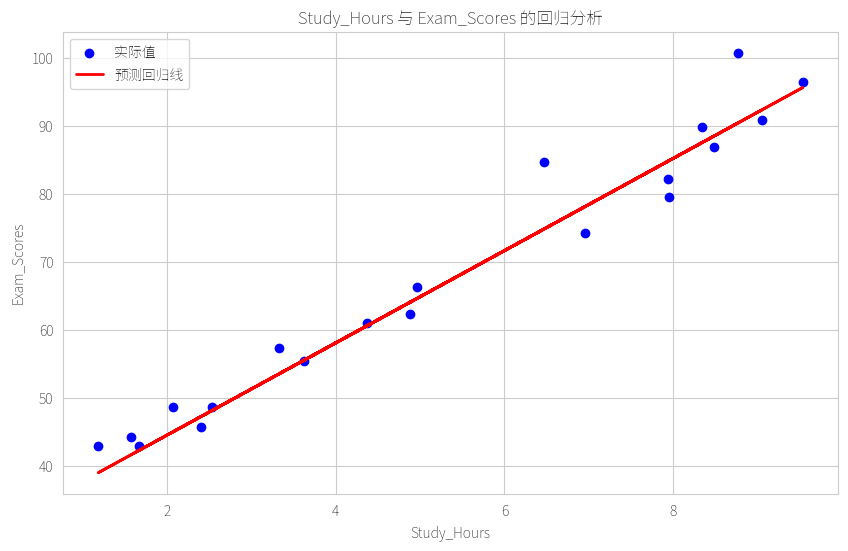

In [15]:
def run_linear_regression_analysis(data, feature_col, target_col):
    """
    执行一元线性回归分析的完整流程模板。
    
    参数:
    data (pd.DataFrame): 包含数据的DataFrame。
    feature_col (str): 自变量列名。
    target_col (str): 因变量列名。
    
    返回:
    dict: 包含模型、评估指标和预测结果的字典。
    """
    # 1. 数据准备和划分
    X = data[[feature_col]]
    y = data[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 2. 模型训练
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 3. 预测与评估
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 4. 打印结果
    print(f'--- 分析报告: {feature_col} vs {target_col} ---')
    print(f'回归方程: {target_col} = {model.intercept_:.2f} + {model.coef_[0]:.2f} * {feature_col}')
    print(f'R-squared (R²): {r2:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    
    # 5. 可视化
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='实际值')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='预测回归线')
    plt.title(f'{feature_col} 与 {target_col} 的回归分析')
    plt.xlabel(feature_col)
    plt.ylabel(target_col)
    plt.legend()
    plt.show()
    
    return {
        'model': model,
        'r2': r2,
        'rmse': rmse,
        'predictions_df': pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    }

# 使用模板函数
results = run_linear_regression_analysis(data, 'Study_Hours', 'Exam_Scores')

## 9. 总结与下一步

通过这个 Notebook，我们完成了一个完整的一元线性回归项目。关键步骤包括：
1. **数据探索(EDA)**：理解数据特性是建模的基础。
2. **数据划分**：保证模型评估的客观性。
3. **模型训练**：使用`sklearn`轻松实现。
4. **模型评估**：用量化指标（如R²和RMSE）来衡量模型的好坏。
5. **结果解释**：将数学结果翻译成有意义的业务结论。

**下一步:**
- 当一个自变量不足以解释因变量时，我们就需要进入下一个主题：**多元线性回归**。